In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import json

KIND = "neural_network"

params = json.loads('''
{
    "network": "lstm_glove",
    "base_size": 16,
    "depth": 2,
    "epochs": 20,
    "patience": 2,
    "dropout": 0.25,
    "batchnorm": false,
    "batch_size": 256,
    "lr": 0.001,
    "optimizer": "adam"
}
''')

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/train.tsv")
model: Model = create_model(kind=KIND, **params)

In [2]:
train, valid = dataset.sfold(0, 6)
history = model.train(train, valid=valid)
accuracy, cm = model.evaluate(valid, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

Predicting: 100%|██████████| 226/226 [00:09<00:00, 24.13it/s]


Training: 0.3774593225967126 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 42.17it/s]


Training: 0.3566502020034313 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 40.14it/s]


Training: 0.3358479993358791 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 40.48it/s]


Training: 0.35703760584426364 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.16it/s]


Training: 0.3602440644197244 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.26it/s]


Training: 0.35591690187614144 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 38.10it/s]


Training: 0.3662522829154906 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 42.72it/s]


Training: 0.38857642924345565 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.76it/s]


Training: 0.3493794620620953 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 40.02it/s]


Training: 0.34341275112070396 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 42.38it/s]


Training: 0.3829659914771155 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 40.01it/s]


Training: 0.3689779456527755 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.96it/s]


Training: 0.2431132049366318 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.32it/s]


Training: 0.41760750456583096 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:09<00:00, 24.92it/s]


Training: 0.36331216448060216 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:07<00:00, 29.74it/s]


Training: 0.3489125020753777 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 39.68it/s]


Training: 0.36543942664231555 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 40.88it/s]


Training: 0.36881191543527586 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:05<00:00, 41.37it/s]


Training: 0.3627691073108639 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:08<00:00, 26.28it/s]


Training: 0.3277056007526703 Validation: 0.3327049137796842


Predicting: 100%|██████████| 226/226 [00:08<00:00, 25.63it/s]


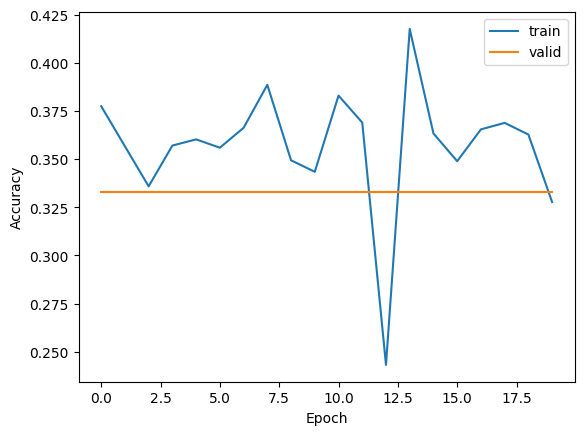

In [3]:
if KIND == "neural_network":
    train_accuracy, valid_accuracy = history
    plt.plot(train_accuracy, label="train")
    plt.plot(valid_accuracy, label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Accuracy: 33.27%


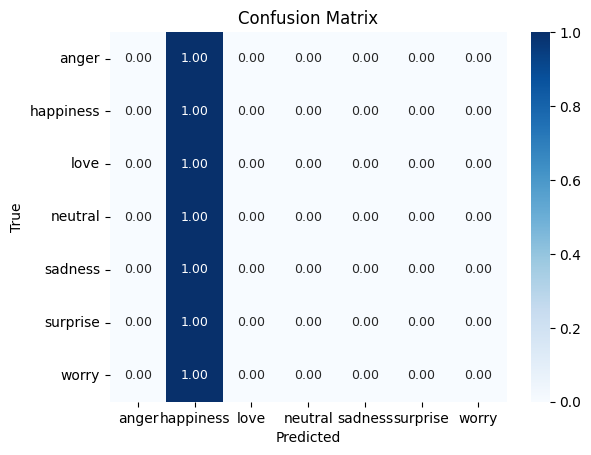

In [4]:
print(f"Accuracy: {accuracy*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()